In [545]:
""" Load Relevant Packages """ 

import sys
sys.path.insert(0,'/Users/christoffer/Desktop/CBS/Cand.merc Finance & Investments/3. Semester/Python For The Financial Economist')

"""
Magic commands
"""



"""
Python packages
"""

import numpy as np
import seaborn as sns
from scipy import stats, optimize
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy
from typing import Union


In [617]:
# Load Data

ret = pd.read_excel('/Users/christoffer/Desktop/CBS/Cand.merc Finance & Investments/Thesis/Kodning/data.xlsx')
returns = ret.set_index('date')

age   aliq_at  aliq_mat  ami_126d     at_be    at_gr1  \
date                                                                     
1972-01-31  0.037883 -0.007454 -0.020488  0.054369  0.024180  0.010442   
1972-02-29  0.017806 -0.019818  0.032995  0.005368  0.046086 -0.015176   
1972-03-31  0.021974 -0.004931  0.018162 -0.000649 -0.012763 -0.009198   
1972-04-30  0.006520  0.000779 -0.007362 -0.012121  0.015937 -0.003775   
1972-05-31  0.006817 -0.025233  0.044107 -0.024831  0.024476 -0.020442   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  0.013011 -0.022634 -0.007924  0.002683 -0.009306 -0.016137   
2021-09-30 -0.009325  0.016817 -0.034469  0.008871 -0.017761  0.024126   
2021-10-31 -0.013323 -0.019887 -0.000228 -0.032848  0.010218 -0.020587   
2021-11-30 -0.057016  0.034987  0.003009 -0.026635 -0.014679  0.034329   
2021-12-31 -0.109037  0.085172 -0.016227 -0.043484 -0.025665  0.062621   

               at_me  at_turnover   be_gr1a     be_me  ...  taccruals_at  \
date                                                   ...                 
1972-01-31 -0.013118     0.029435 -0.013738 -0.001346  ...     -0.000231   
1972-02-29 -0.059391     0.031163 -0.042011 -0.045496  ...     -0.028725   
1972-03-31  0.001595    -0.009378  0.009566 -0.011649  ...     -0.009680   
1972-04-30 -0.010687     0.009248  0.006202 -0.007087  ...      0.009751   
1972-05-31 -0.049535     0.006413 -0.045290 -0.050203  ...     -0.043925   
...              ...          ...       ...       ...  ...           ...   
2021-08-31 -0.000957    -0.021740  0.000847 -0.005902  ...     -0.001127   
2021-09-30  0.046149    -0.034979  0.036886  0.041106  ...     -0.001401   
2021-10-31 -0.014540     0.011777 -0.030676 -0.014004  ...      0.000949   
2021-11-30  0.005782     0.032265 -0.001426 -0.000508  ...     -0.028157   
2021-12-31  0.057675     0.026838  0.034829  0.045291  ...     -0.022867   

            taccruals_ni  tangibility  tax_gr1a  turnover_126d  \
date                                                             
1972-01-31     -0.012285    -0.032543 -0.002028      -0.053315   
1972-02-29     -0.013358    -0.011268  0.018009      -0.019640   
1972-03-31     -0.001962     0.004086  0.003710       0.012965   
1972-04-30      0.008362     0.006240  0.000332       0.000843   
1972-05-31     -0.031657     0.004676  0.021380       0.001183   
...                  ...          ...       ...            ...   
2021-08-31     -0.001539     0.012640 -0.000176      -0.007900   
2021-09-30      0.000919     0.004204 -0.014777      -0.009959   
2021-10-31      0.000314     0.015777  0.004160       0.002053   
2021-11-30     -0.023400    -0.000938  0.025011       0.022068   
2021-12-31     -0.009365    -0.057326  0.015376       0.079209   

            turnover_var_126d   z_score  zero_trades_126d  zero_trades_21d  \
date                                                                         
1972-01-31           0.000777 -0.000433         -0.031340        -0.048364   
1972-02-29          -0.002697  0.048543         -0.010623        -0.018154   
1972-03-31          -0.018088  0.019020          0.018345         0.012468   
1972-04-30           0.008910  0.006571          0.000484        -0.003884   
1972-05-31           0.004355  0.034652          0.003485         0.007861   
...                       ...       ...               ...              ...   
2021-08-31           0.000434  0.010744         -0.007961        -0.008092   
2021-09-30           0.002775 -0.041023         -0.009837        -0.009468   
2021-10-31           0.019828  0.026900          0.002473        -0.001758   
2021-11-30           0.037379  0.003060          0.022158         0.012303   
2021-12-31           0.079108 -0.056297          0.078870         0.066361   

            zero_trades_252d  
date                          
1972-01-31         -0.027658  
1972-02-29         -0.006836  
1972-03-31          0.019011  
1972-04-30          0.002580  
1972-

In [618]:
# colors for factors

cmap = plt.get_cmap('jet')
ind_colors = cmap(np.linspace(0, 1, 153))

# Define inputs for calculations

In [619]:
"""Define inputs"""

# number of periods
num_periods = len(ret)

# number of factors
num_assets = 153

# window size 
window_size =  12 * 5 # 5 years of monthly observations 

# effective number of periods
eff_num_periods = num_periods - window_size

# half-life
half_life = 60

# time points
time_points = np.arange(1, window_size + 1)

# exponential probabilities 
def calculate_exponential_decay_probabilities(target_time_point: Union[int, float], time_points: np.ndarray,
                                              half_life: Union[float, int]) -> np.ndarray:
    """
    Calculates exponential decay probabilities for an array of time points based on a target time point and a half life.
    Parameters
    ----------
    target_time_point:
        The target time point.
    time points:
        The array of time points to calculate probabilities for.
    half_life:
        The half life of the exponential decay.
    Returns
    -------
    Exponential decay probabilities.
    """
    
    numerator = np.exp(-np.log(2) / half_life * np.clip(target_time_point - time_points, 0, np.inf))
    denominator = np.sum(numerator)

    p_t = numerator / denominator

    return p_t

exp_probs = calculate_exponential_decay_probabilities(window_size, time_points, half_life)

# equally weighted portfolio
w_eq = np.repeat(1.0 / num_assets, num_assets)
weights_eq = np.array(w_eq).astype(float)


# Calculate Risk Contributions for eq_weigths

In [620]:
def calculate_cov_mat(x: np.ndarray, probs: np.ndarray, axis: int = 0) -> np.ndarray:

    """
    Estimates a covariance matrix based on a historical dataset and a set of probabilities.
    Parameters
    ----------
    x:
        The dataset to estimate covariance for.
    probs:
        The probabilities to weight the observations of the dataset by.
    axis:
        The axis to estimate over.
    Returns
    -------
    np.ndarray
        The estimated covariance matrix.
    """

    x = x.T if axis == 1 else x

    expected_x_squared = np.sum(probs[:, None, None] * np.einsum('ji, jk -> jik', x, x), axis=0)
    mu = probs @ x
    mu_squared = np.einsum('j, i -> ji', mu, mu)
    cov_mat = expected_x_squared - mu_squared

    return cov_mat

In [621]:
rel_risk_contribs = np.zeros((eff_num_periods, num_assets))

"""
Perform calculations
"""

for t in range(eff_num_periods):
    
    # covariance matrix
    cov_mat = calculate_cov_mat(returns.iloc[t: window_size + t, :].values, probs=exp_probs)
    
    # calculate relative risk constribution 
    rel_risk_contribs[t, :] = rb.calculate_risk_contributions_std(w_eq, cov_mat, scale=True)

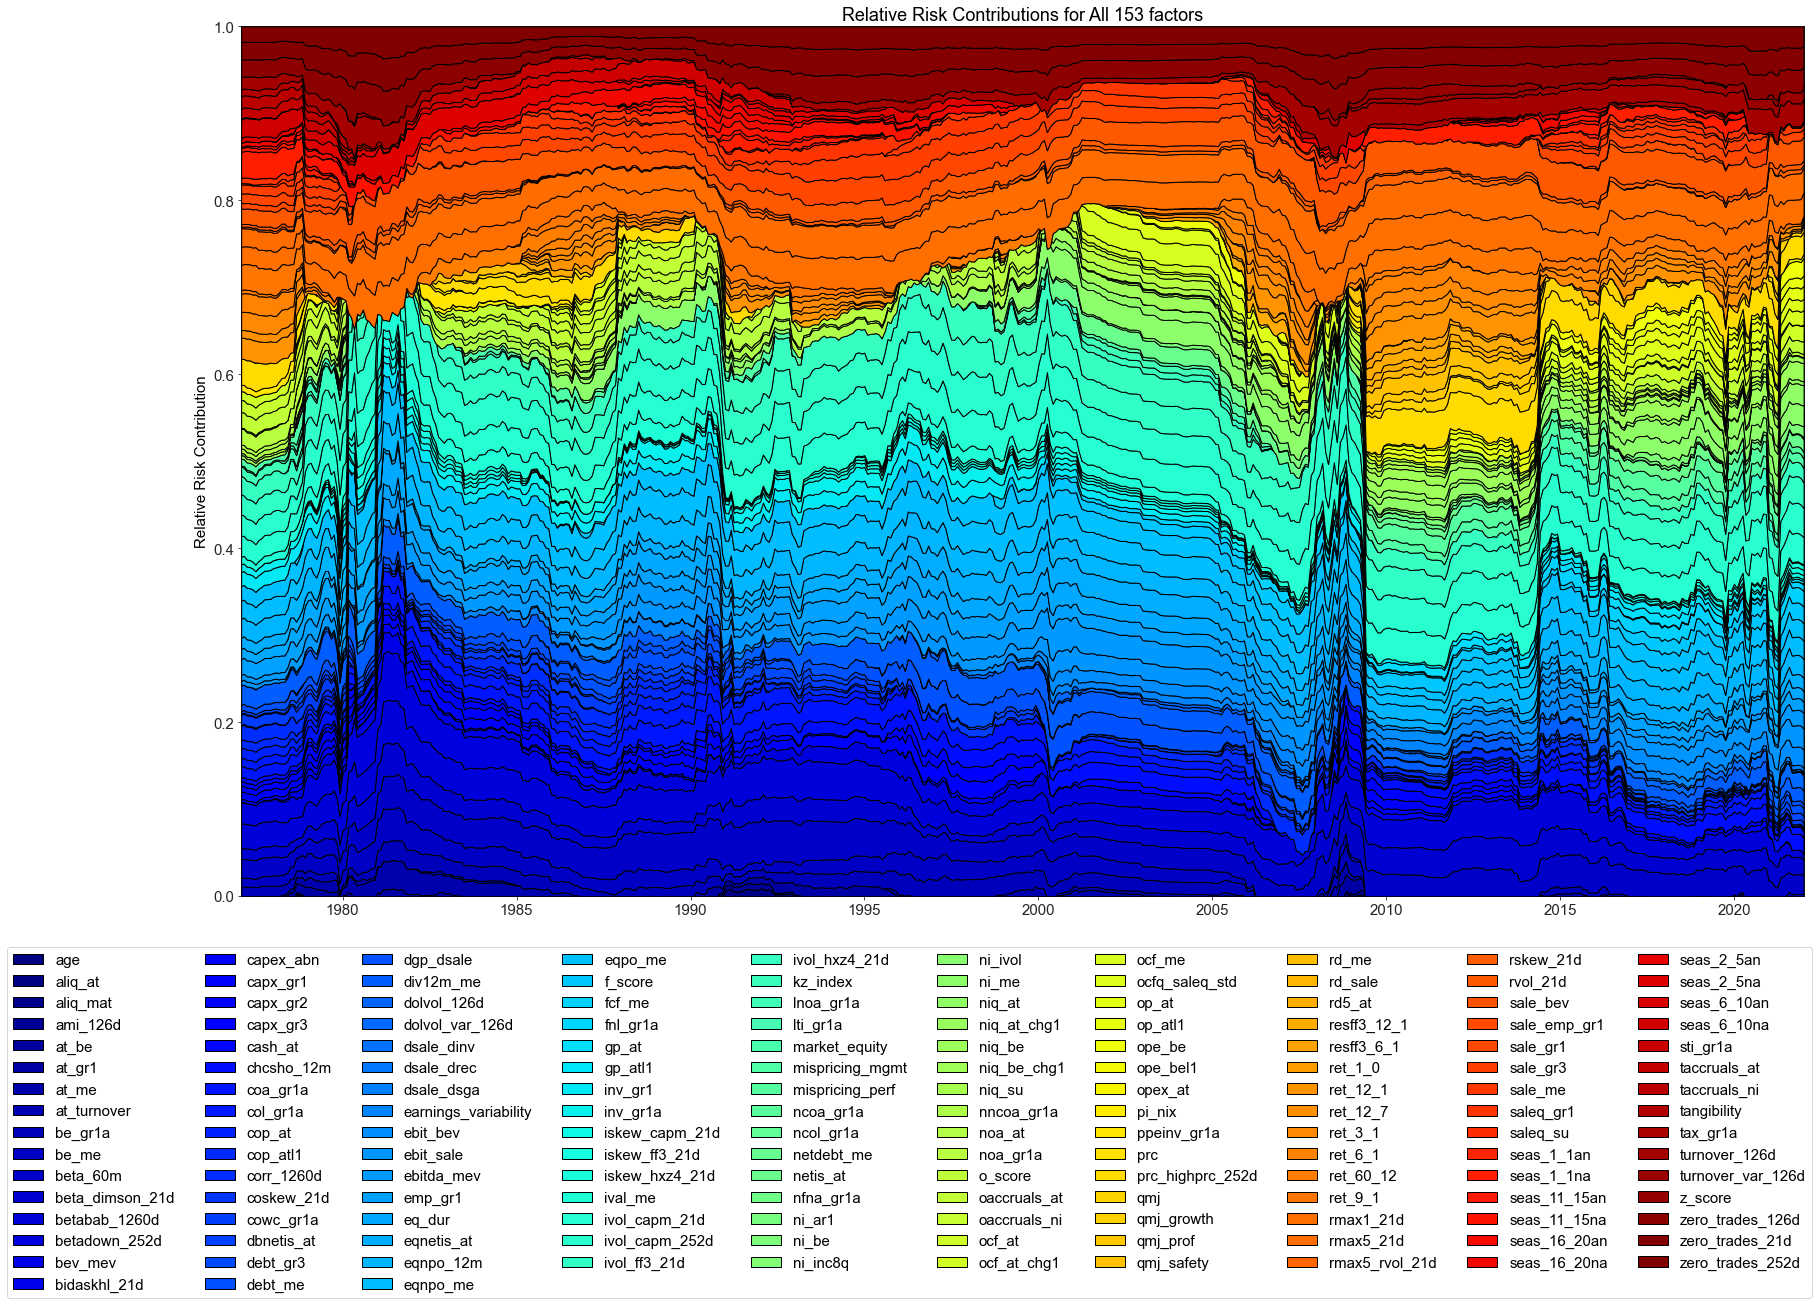

In [631]:
"""
Plot Risk contributions
"""

fig, ax = plt.subplots(figsize=(28, 16))

ax.stackplot(returns.index[window_size:],
              rel_risk_contribs.T,
              edgecolor="black",
              labels=returns.columns,
              colors=ind_colors);

ax.set_ylabel('Relative Risk Contribution')
ax.set_title("Relative Risk Contributions for All 153 factors");
ax.set_ylim(0,1)
ax.legend(ncol=10, bbox_to_anchor=(1.01, -0.05));

# Calculate Diversification Ratio

In [623]:
"""
Define function for portfolio std and var
"""

def calculate_portfolio_variance(weights: np.ndarray, cov_mat: np.ndarray) -> float:

    return weights @ cov_mat @ weights


def calculate_portfolio_std(weights: np.ndarray, cov_mat: np.ndarray) -> float:

    return np.sqrt(calculate_portfolio_variance(weights, cov_mat))

In [624]:
"""
Define function to calculate the diversification ratio of Yves Choueifaty and Yves Coignard (2008)
"""

def calculate_cc_ratio(weights: np.ndarray, cov_mat: np.ndarray):

    port_std = calculate_portfolio_std(weights=weights, cov_mat=cov_mat)

    vol_vec = np.sqrt(np.diag(cov_mat))
    avg_std = np.inner(weights, vol_vec)

    return avg_std / port_std


In [625]:
cc_ratios = np.zeros(eff_num_periods)
avg_corr = np.zeros(eff_num_periods)

upper_tri_idx = np.triu_indices(num_assets)

"""
Perform calculations
"""

for t in range(eff_num_periods):
    
    # covariance matrix
    cov_mat = calculate_cov_mat(returns.iloc[t: window_size + t, :].values, probs=exp_probs)
    
    # average correlation
    avg_corr[t] = cov_to_corr_matrix(cov_mat)[upper_tri_idx].flatten().mean()
    
    # calculate relative risk constribution 
    cc_ratios[t] = calculate_cc_ratio(w_eq, cov_mat)

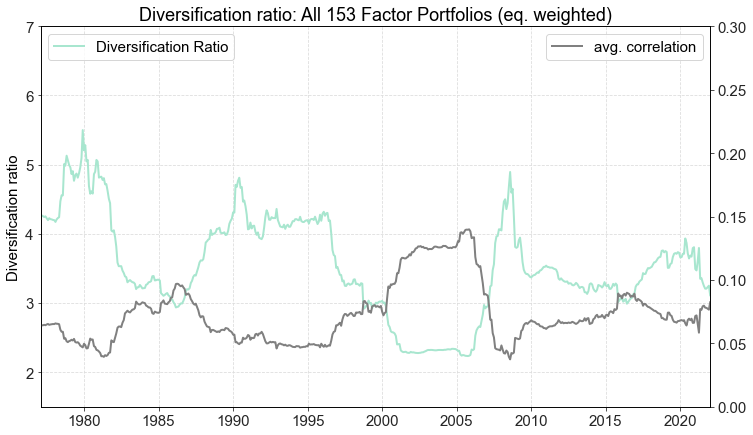

In [627]:
"""
Plot Diversification Ratio and Average Correlation
"""

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(returns.index[window_size:], cc_ratios, label="Diversification Ratio")
ax.set_ylabel("Diversification ratio")
ax.set_title("Diversification ratio: All 153 Factor Portfolios (eq. weighted)");
ax.legend(loc='upper left')
ax_new = ax.twinx()
ax.set_ylim(1.5,7)
ax_new.set_ylim(0,0.3)

ax_new.plot(returns.index[window_size:], avg_corr, label="avg. correlation", color="gray")
ax_new.legend(loc='upper right')
ax_new.grid(None)

# Most Diversified Portfolio

In [628]:
"""
Define function for long only portfolio
"""

def calculate_most_diversified_portfolio(cov_mat: np.ndarray, init_weights=None) -> np.ndarray:
    
    # define intial values
    n = cov_mat.shape[0]
    if init_weights is None:
        init_weights = np.repeat(1.0 / n, n)
    
    # define sum to one constraint
    eq_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    
    # perform optimization
    res = optimize.minimize(lambda x: -calculate_cc_ratio(x, cov_mat), init_weights,
                            constraints=[eq_constraint,], bounds=[(0, 1)]*n)
    
    return res.x

In [629]:
"""
Perform calculations for MDP
"""

most_div_port_weights = np.zeros((eff_num_periods, num_assets))
most_div_port_cc = np.zeros(eff_num_periods)


for t in range(eff_num_periods):
    
    # covariance matrix
    cov_mat = calculate_cov_mat(returns.iloc[t: window_size + t, :].values, probs=exp_probs)
    
    # most diversified
    most_div_port_weights[t, :] = calculate_most_diversified_portfolio(cov_mat)
    most_div_port_cc[t] = calculate_cc_ratio(most_div_port_weights[t, :], cov_mat)

# store in data-frame
df_most_div_port_weights = pd.DataFrame(data=most_div_port_weights,
                                        index=returns[window_size:].index,
                                        columns=returns.columns)

(0.0, 1.0)

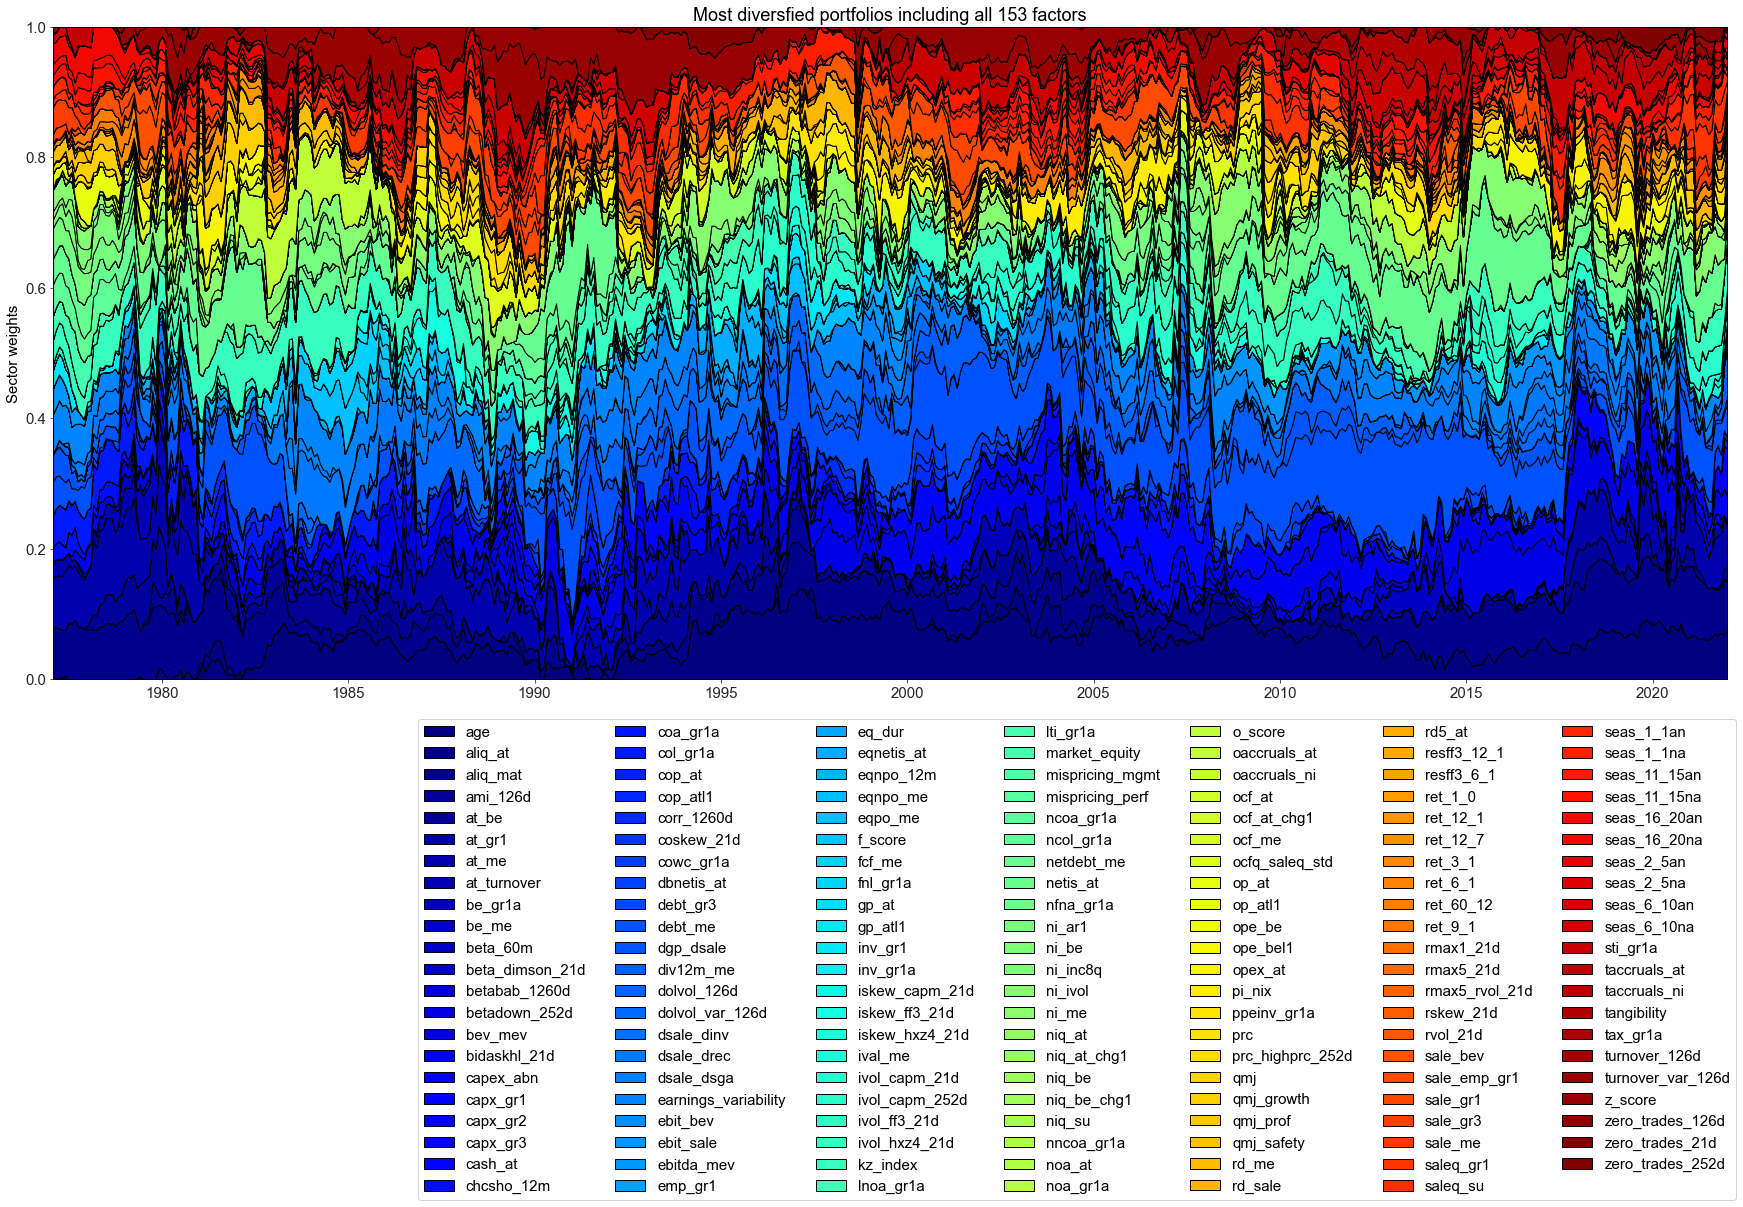

In [643]:
""" 
Plot MDP Weights
"""

fig, ax = plt.subplots(figsize=(30, 12))

ax.stackplot(returns.index[window_size:],
              most_div_port_weights.T,
              edgecolor="black",
              labels=returns.columns,
              colors=ind_colors);

ax.set_ylabel('Sector weights')
ax.set_title("Most diversfied portfolios including all 153 factors");
ax.legend(ncol=7, bbox_to_anchor=(1.01, -0.05));
ax.set_ylim(0,1)

# Minimum Variance Portfolio

In [598]:
"""
Define function for minimum variance portfolio
"""

def calculate_min_var_portfolio(cov_mat: np.ndarray, init_weights=None) -> np.ndarray:
    
    # define intial values
    n = cov_mat.shape[0]
    if init_weights is None:
        init_weights = np.repeat(1.0 / n, n)
    
    # define sum to one constraint
    eq_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    
    # perform optimization
    res = optimize.minimize(lambda x: calculate_portfolio_variance(x, cov_mat)*100*100,
                            init_weights,
                            constraints=[eq_constraint,],
                            bounds=[(0, 1)]*n)
    
    return res.x

In [599]:
"""
Perform calculations for min_var
"""

min_var_port_weights = np.zeros((eff_num_periods, num_assets))
min_var_port_cc = np.zeros(eff_num_periods)


for t in range(eff_num_periods):
    
    # covariance matrix
    cov_mat = calculate_cov_mat(returns.iloc[t: window_size + t, :].values, probs=exp_probs)
    
    # mnimum variance
    min_var_port_weights[t, :] = calculate_min_var_portfolio(cov_mat)
    min_var_port_cc[t] = calculate_cc_ratio(min_var_port_weights[t, :], cov_mat)
    
# store in data-frame
df_min_var_port_weights = pd.DataFrame(data=min_var_port_weights,
                                        index=returns[window_size:].index,
                                        columns=returns.columns)

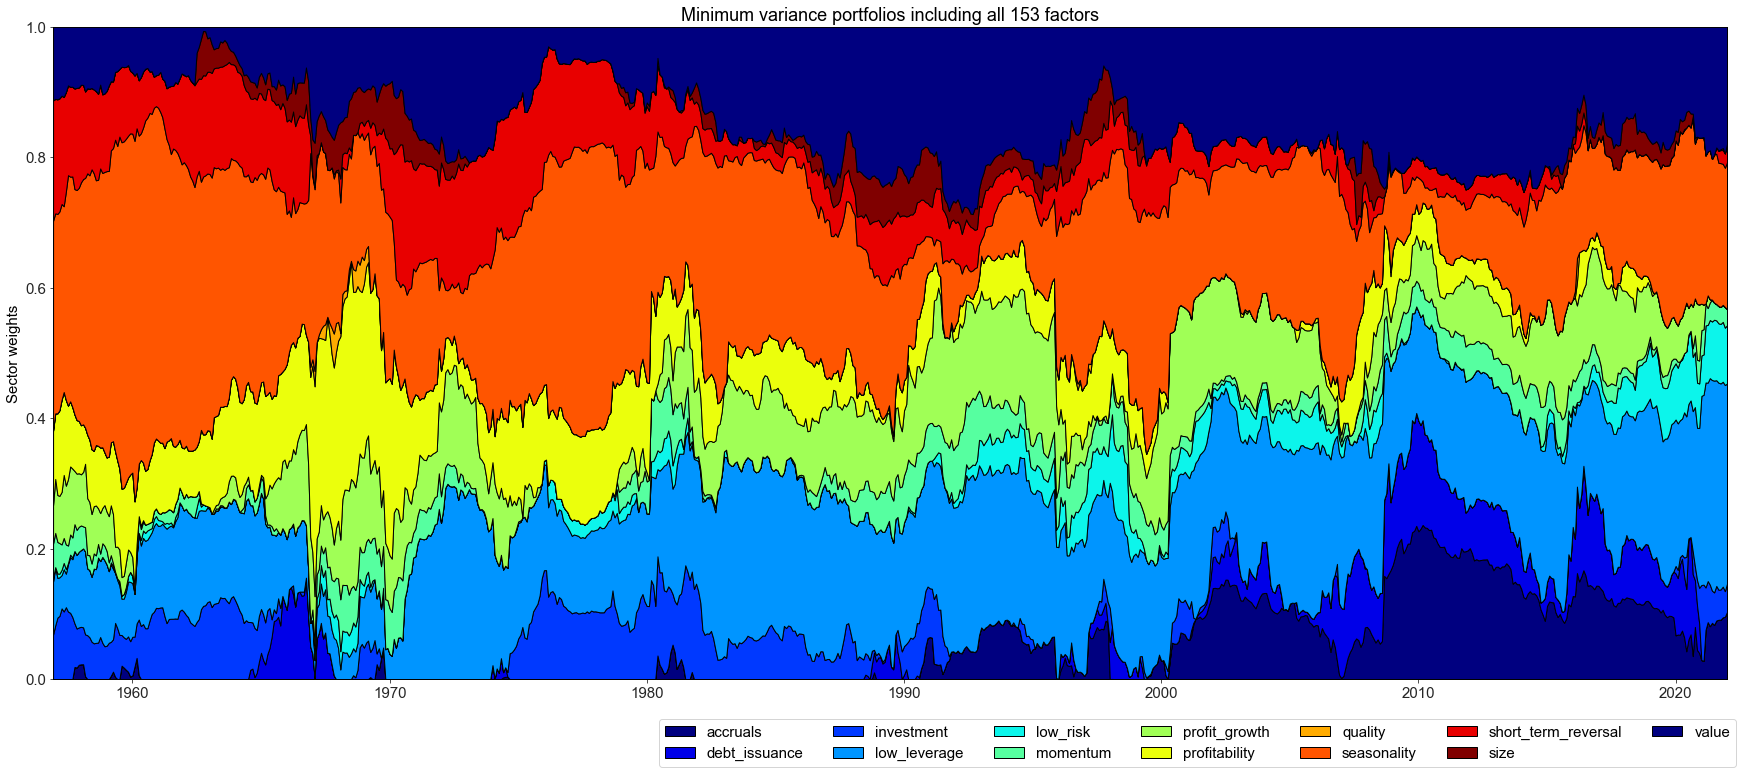

In [600]:
"""
Plot Minimum Variance Weights
"""

fig, ax = plt.subplots(figsize=(30, 12))

ax.stackplot(returns.index[window_size:],
              min_var_port_weights.T,
              edgecolor="black",
              labels=returns.columns,
              colors=ind_colors);

ax.set_ylabel('Sector weights')
ax.set_title("Minimum variance portfolios including all 153 factors");
ax.legend(ncol=7, bbox_to_anchor=(1.01, -0.05));

# Diversifaction Ratio For All Portfolios

In [ ]:
ax.plot(returns.index[window_size:], min_var_port_cc, label="DR, minimum variance")


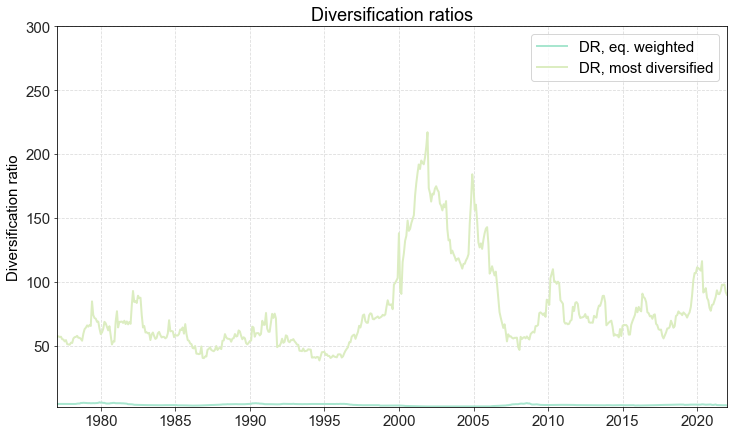

In [635]:
"""
Plotting Diversification Ratios
"""

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(returns.index[window_size:], cc_ratios, label="DR, eq. weighted")
ax.plot(returns.index[window_size:], most_div_port_cc, label="DR, most diversified")
ax.set_ylabel("Diversification ratio")
ax.set_title("Diversification ratios");
ax.set_ylim(2,300)
ax.legend();

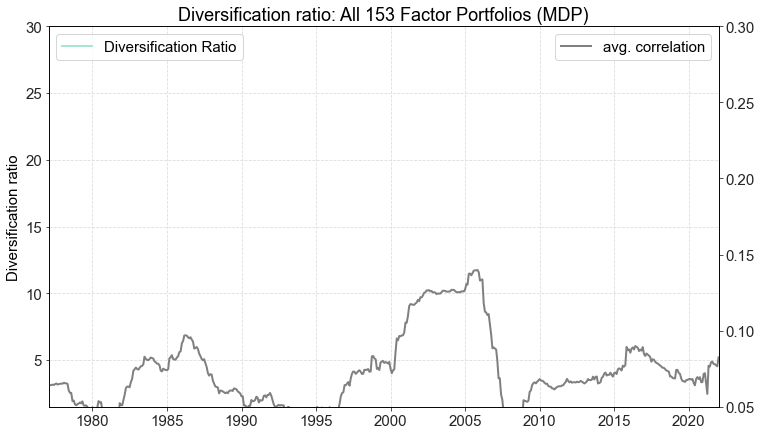

In [636]:
"""
Plot Diversification Ratio and Average Correlation
"""

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(returns.index[window_size:], most_div_port_cc, label="Diversification Ratio")
ax.set_ylabel("Diversification ratio")
ax.set_title("Diversification ratio: All 153 Factor Portfolios (MDP)");
ax.legend(loc='upper left')
ax_new = ax.twinx()
ax.set_ylim(1.5,30)
ax_new.set_ylim(0.05,0.3)

ax_new.plot(returns.index[window_size:], avg_corr, label="avg. correlation", color="gray")
ax_new.legend(loc='upper right')
ax_new.grid(None)

# Evaluating Strategies

In [637]:
df_port_ret = pd.DataFrame(index=returns.index[window_size:])

# monthly return
df_port_ret['min-var'] = (returns[window_size:] * df_min_var_port_weights).sum(axis=1)
df_port_ret['most-div'] = (returns[window_size:] * df_most_div_port_weights).sum(axis=1)
df_port_ret['eq-weight'] = (returns[window_size:] @ w_eq)

# total return index
df_port_tri = (1 + df_port_ret).cumprod(axis=0)

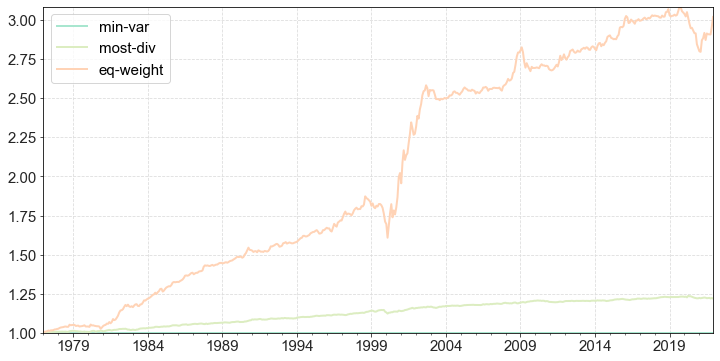

In [638]:
"""
Plot Cummulative Returns 
"""

df_port_tri.plot(xlabel="", figsize=(12, 6));

In [639]:
mean_return = df_port_ret.mean(axis=0)
mean_return

min-var      0.000000
most-div     0.000368
eq-weight    0.002097
dtype: float64

In [640]:
std_return = df_port_ret.std(axis=0)
std_return

min-var      0.000000
most-div     0.001635
eq-weight    0.009853
dtype: float64

In [641]:
ir_ratio = mean_return / std_return
ir_ratio

min-var           NaN
most-div     0.225045
eq-weight    0.212835
dtype: float64